In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import os
import cv2
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import keras
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint



In [4]:
# def load_images_from_folder(folder,max_ind):
#     images = []
#     labels = []
    
#     count = 0
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#             labels.append(folder)
#         count += 1
#         if count>max_ind:
#             return [images,labels]
#     return [images,labels]

In [5]:
# datadir = 'D:\KURSOVAYA\data\extracted_images'
# x_train = []
# y_train = []
# # x_train = np.array([])
# # y_train = np.array([])
# for folder in os.listdir(datadir):
#     print(folder)
#     path = os.path.join(datadir, folder) 
#     tmp = load_images_from_folder(path,2000)
#     if tmp != []:
#         x_train.append(tmp[0])
#         y_train.append(tmp[1])

!
(
)
+
,
-
0
1
2
3
4
5
6
7
8
9
=
A
alpha
ascii_124
b
beta
C
cos
d
Delta
div
e
exists
f
forall
forward_slash
G
gamma
geq
gt
H
i
in
infty
int
j
k
l
lambda
ldots
leq
lim
log
lt
M
mu
N
neq
o
p
phi
pi
pm
prime
q
R
rightarrow
S
sigma
sin
sqrt
sum
T
tan
theta
times
u
v
w
X
y
z
[
]
{
}


In [33]:
x = []
y = []
count = 0
datadir = "D:\\KURSOVAYA\\data\\extracted_images\\"  # путь к папке с изображениями

max_members = 3000  # константа количества вхождений каждого символа 
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    print(folder)
    count = 0
    i=0
    len_dir = len(os.listdir(path))
    # цикл для выравнивания классов по количеству элементов
    while i < len_dir:
        images = os.listdir(path)[i]  # имена файлов в каждой папке
        img = cv2.imread(os.path.join(path, images),0)  # полный путь, imread - перевод в матрицу
        x.append(cv2.resize(img,(28,28)))  # downsсale матрицы и добавление в массив
        y.append(folder)                   # добавление описания к данной матрице
        count+=1
        i+=1
        if count>max_members:
            break
        if i == len_dir and count<max_members:
            i=0
        
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')



!
(
)
+
,
-
0
1
2
3
4
5
6
7
8
9
=


KeyboardInterrupt: 

In [10]:
# сохраним базу в файл чтобы передать в google colaboratory
a_file = open("y.txt", "w")
np.savetxt(a_file, y,fmt='%s')
a_file.close()

a_file = open("x.txt", "w")
np.savetxt(a_file, x,fmt='%s')
a_file.close()

In [14]:
# print(y[150000])
# plt.figure()
# plt.imshow(x[150000])
# plt.colorbar()
# plt.grid(True)
print(np.array(y).shape)
y.shape

(246082,)


AttributeError: 'list' object has no attribute 'shape'

In [26]:
x_test, y_test = x[::10], y[::10]
# делим на тестовый и тренировочный наборы
x_train= np.array([item for index, item in enumerate(x) if (index) % 10 != 0])
y_train= np.array([item for index, item in enumerate(y) if (index) % 10 != 0])
x_train.shape

(244557, 28, 28)

d:\changeface\miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


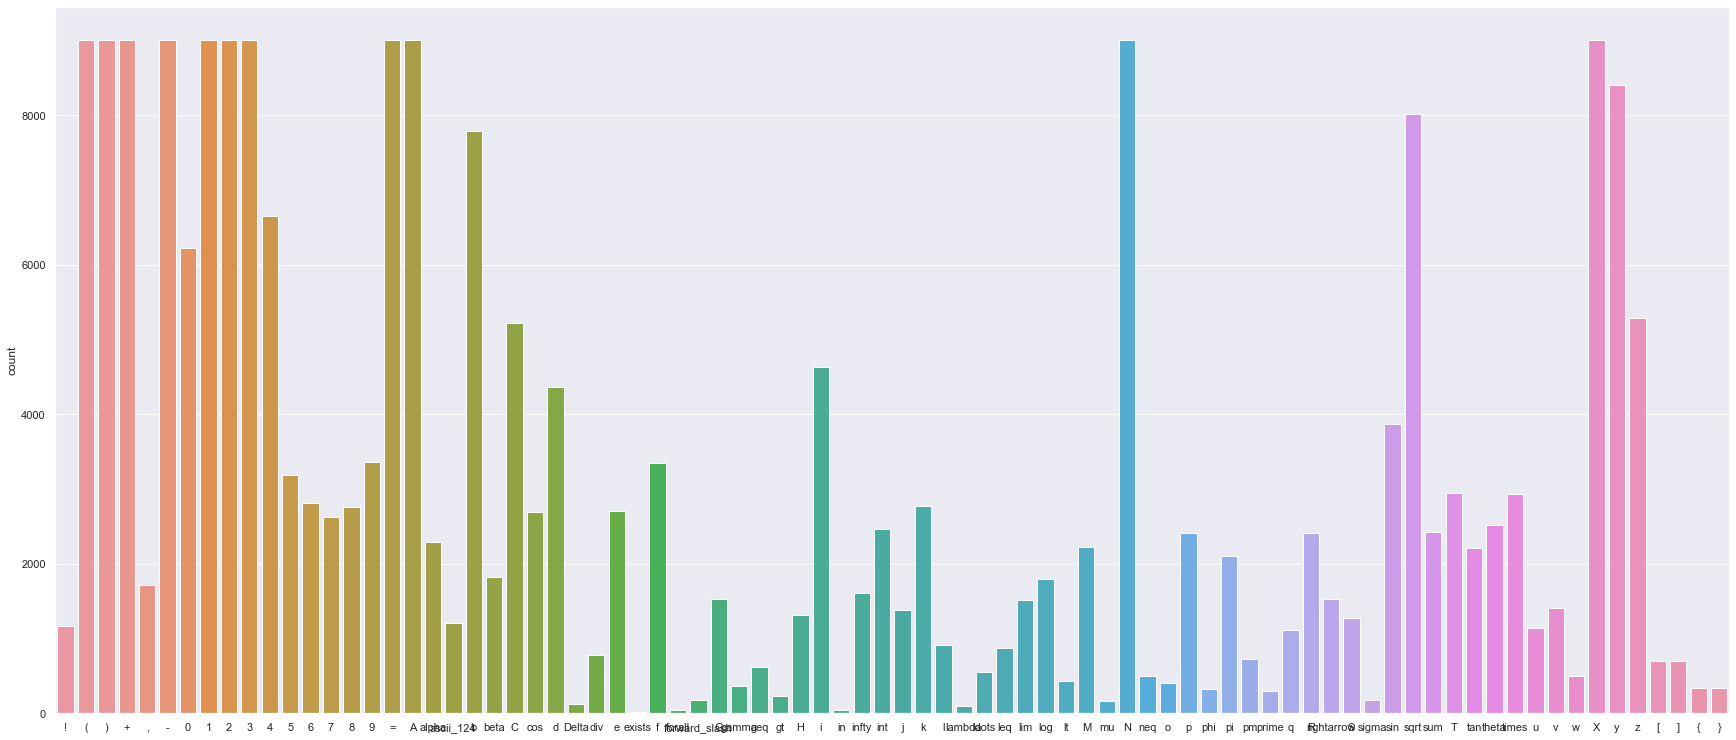

In [32]:
g = sns.countplot(np.array(y_train,dtype="str"))
sns.set(rc={'figure.figsize':(40,13)})
#это оказалось большой проблемой в обучении, нужно хоть немного уравнять пропорции иначе сеть будет плохо обучаема

(array([[0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.12345679, 0.    

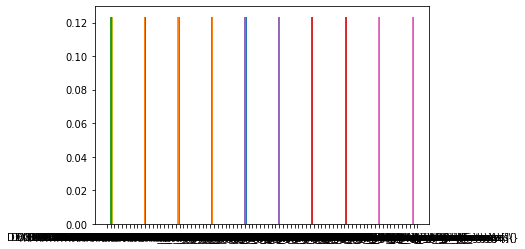

In [20]:
plt.hist(y_train,density=True)

In [8]:
# нормализация
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

In [9]:
# составляем список соответствий значаний и номеров для нейросети
from operator import itemgetter
enum_labels = [[index,item] for index, item in enumerate(sorted(list(set(y))))]

def label_to_num(label,enum_labels):
    for i in enum_labels:
        if i[1] == label:
            return i[0]
        
#enum_labels = [[0, '('], [1, 'forward_slash'], [2, 'cos'], [3, 'R'], [4, 'rightarrow'], [5, '3'], [6, 'f'], [7, '-'], [8, '6'], [9, '1'], [10, 'b'], [11, 'ascii_124'], [12, '5'], [13, 'G'], [14, 'l'], [15, '7'], [16, 'lim'], [17, 'int'], [18, '9'], [19, 'sigma'], [20, 'geq'], [21, ','], [22, 'A'], [23, 'times'], [24, 'M'], [25, 'infty'], [26, 'pi'], [27, 'sum'], [28, 'log'], [29, 'o'], [30, 'tan'], [31, 'u'], [32, '+'], [33, 'sin'], [34, 'mu'], [35, '!'], [36, 'z'], [37, 'Delta'], [38, '8'], [39, 'ldots'], [40, 'beta'], [41, 'p'], [42, 'sqrt'], [43, 'i'], [44, 'forall'], [45, 'neq'], [46, '}'], [47, 'gt'], [48, 'y'], [49, 'leq'], [50, 'N'], [51, 'q'], [52, 'theta'], [53, 'd'], [54, ']'], [55, 'w'], [56, 'j'], [57, 'prime'], [58, 'k'], [59, 'phi'], [60, 'X'], [61, '{'], [62, '='], [63, 'exists'], [64, '['], [65, 'T'], [66, 'lambda'], [67, 'v'], [68, 'S'], [69, 'e'], [70, 'alpha'], [71, '2'], [72, 'C'], [73, 'pm'], [74, 'lt'], [75, 'in'], [76, '4'], [77, '0'], [78, 'gamma'], [79, 'H'], [80, ')'], [81, 'div']]

In [72]:
print(enum_labels) # перевод из подписей в нумерацию для нейросети


[[0, '!'], [1, '('], [2, ')'], [3, '+'], [4, ','], [5, '-'], [6, '0'], [7, '1'], [8, '2'], [9, '3'], [10, '4'], [11, '5'], [12, '6'], [13, '7'], [14, '8'], [15, '9'], [16, '='], [17, 'A'], [18, 'C'], [19, 'Delta'], [20, 'G'], [21, 'H'], [22, 'M'], [23, 'N'], [24, 'R'], [25, 'S'], [26, 'T'], [27, 'X'], [28, '['], [29, ']'], [30, 'alpha'], [31, 'ascii_124'], [32, 'b'], [33, 'beta'], [34, 'cos'], [35, 'd'], [36, 'div'], [37, 'e'], [38, 'exists'], [39, 'f'], [40, 'forall'], [41, 'forward_slash'], [42, 'gamma'], [43, 'geq'], [44, 'gt'], [45, 'i'], [46, 'in'], [47, 'infty'], [48, 'int'], [49, 'j'], [50, 'k'], [51, 'l'], [52, 'lambda'], [53, 'ldots'], [54, 'leq'], [55, 'lim'], [56, 'log'], [57, 'lt'], [58, 'mu'], [59, 'neq'], [60, 'o'], [61, 'p'], [62, 'phi'], [63, 'pi'], [64, 'pm'], [65, 'prime'], [66, 'q'], [67, 'rightarrow'], [68, 'sigma'], [69, 'sin'], [70, 'sqrt'], [71, 'sum'], [72, 'tan'], [73, 'theta'], [74, 'times'], [75, 'u'], [76, 'v'], [77, 'w'], [78, 'y'], [79, 'z'], [80, '{'], [8

In [10]:
y_train = [label_to_num(label,enum_labels) for label in y_train]
y_test = [label_to_num(label,enum_labels) for label in y_test]
# перевод в вектор
y_train = to_categorical(y_train, num_classes = len(list(set(y))))
y_test = to_categorical(y_test, num_classes = len(list(set(y))))

In [75]:
#делаем свёрточную нейронную сеть
# my CNN architechture is 
#In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
#-> Flatten -> Dense -> Dropout -> Out
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', 
#                  activation ='relu', input_shape = (45,45,1)))
# model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (6,6),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (6,6),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 128, kernel_size = (4,4),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (4,4),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(1024, activation = "relu")) #512
# model.add(Dropout(0.5))
# model.add(Dense(82, activation = "softmax")) 

In [28]:
# пробуем другую структуру нейросети
def math_symbol_and_digits_recognition(input_shape=(28, 28, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(720, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(504, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(82, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = math_symbol_and_digits_recognition(input_shape=(28, 28, 1))
model.summary()


def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(x_train.reshape(len(x_train),28,28,1), y_train, batch_size=128), batch_size=128, epochs=1, validation_data=(x_test.reshape(len(x_test),28,28,1), y_test))

model.save('emnist_CNN_New_structure.h5')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 act1 (Activation)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        9248      
                                                                 
 act2 (Activation)           (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 

In [47]:
hist = model.fit(aug.flow(x_train.reshape(len(x_train),28,28,1), y_train, batch_size=128), batch_size=128, epochs=10, validation_data=(x_test.reshape(len(x_test),28,28,1), y_test),shuffle = True)

model.save('emnist_CNN_New_structure.h5')

Epoch 1/10
578/578 [==============================] - 43s 75ms/step - loss: 0.4097 - accuracy: 0.8839 - val_loss: 0.3344 - val_accuracy: 0.9207
Epoch 2/10
578/578 [==============================] - 44s 75ms/step - loss: 0.3954 - accuracy: 0.8882 - val_loss: 0.3139 - val_accuracy: 0.9257
Epoch 3/10
578/578 [==============================] - 43s 75ms/step - loss: 0.3787 - accuracy: 0.8932 - val_loss: 0.3072 - val_accuracy: 0.9241
Epoch 4/10
578/578 [==============================] - 43s 75ms/step - loss: 0.3695 - accuracy: 0.8944 - val_loss: 0.3050 - val_accuracy: 0.9292
Epoch 5/10
578/578 [==============================] - 44s 76ms/step - loss: 0.3647 - accuracy: 0.8955 - val_loss: 0.2862 - val_accuracy: 0.9289
Epoch 6/10
578/578 [==============================] - 45s 78ms/step - loss: 0.3521 - accuracy: 0.8992 - val_loss: 0.2944 - val_accuracy: 0.9352
Epoch 7/10
578/578 [==============================] - 44s 76ms/step - loss: 0.3467 - accuracy: 0.9014 - val_loss: 0.3119 - val_accuracy:

Метод проб и ошибок – это хорошо, но вам понадобится обоснованная отправная точка. В той же книге, ссылка на которую приведена выше (на странице 159), доктор Хитон упоминает три практических правила для выбора размерности скрытого слоя. Я буду опираться на них, предлагая рекомендации, основанные на моей смутной интуиции в обработке сигналов.

1.Если в нейросети только один выходной узел, и вы считаете, что требуемая связь вход-выход довольно проста, начните с размерности скрытого слоя, равной двум третям входной размерности.

2.Если у вас есть несколько выходных узлов или вы считаете, что требуемая связь вход-выход является сложной, сделайте размерность скрытого слоя равной сумме входная размерность плюс выходная размерность (но при этом она должна оставаться меньше удвоенной входной размерности).

3.Если вы считаете, что требуемая связь вход-выход является крайне сложной, установите размерность скрытого слоя равной на единицу меньше удвоенной входной размерности.

In [76]:
# оптимизатор
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [77]:
# компиляция модели
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [78]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
# image data generator чтобы повысить точность неросети и предупредить переобучение
# x_train = x_train.reshape(len(x_train),45,45)
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train.reshape(len(x_train),45,45,1))

In [81]:
epochs = 30 # после 30 эпох точность достигает %
batch_size = 100

In [34]:
# тренировка модели без генератора

#model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test),shuffle = True, verbose = 1,steps_per_epoch=100, validation_steps=5)

# тренировка модели с генератором
#model.fit(datagen.flow(x_train,y_train, batch_size=batch_size), batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), verbose = 1)


model = keras.models.load_model('emnist_CNN_.h5')

#model.save('emnist_CNN_3COV_lauers_equaled_1.h5')

In [ ]:
# тренировка модели с генератором
# model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_test.reshape(len(x_test+1), 45, 45,1), y_test),
#                               verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])

# model.save('emnist_CNN1.h5')

In [48]:
#предсказываем
predictions = model.predict(x_test)

!
,
3
8
ascii_124
d
f
geq


<ipython-input-49-589eb1494b9e>:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


infty
lambda
lt
o
)
sigma
tan
w
]


IndexError: index 8500 is out of bounds for axis 0 with size 8209

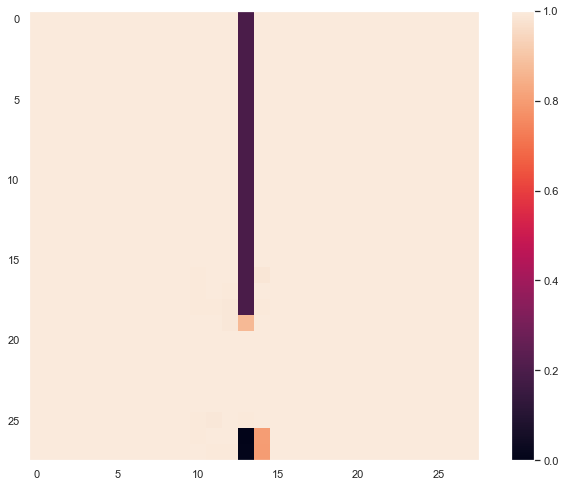

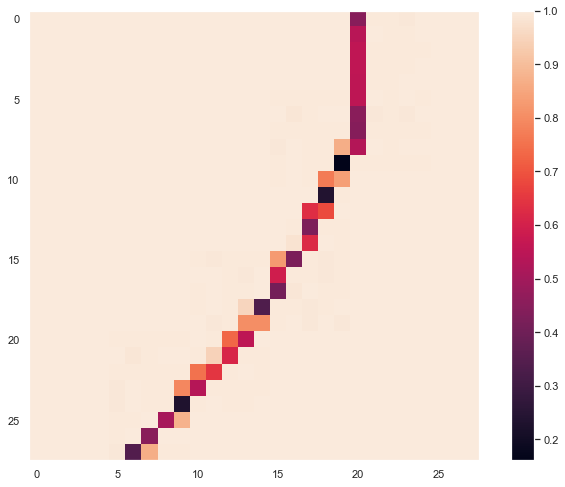

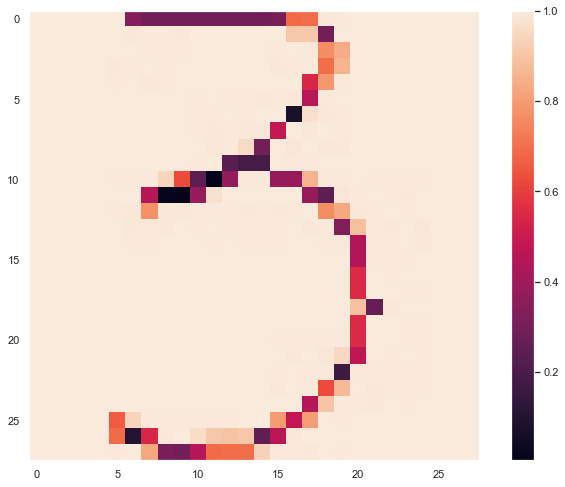

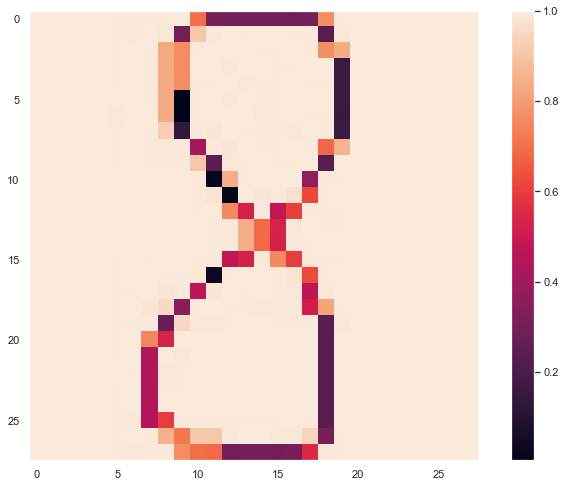

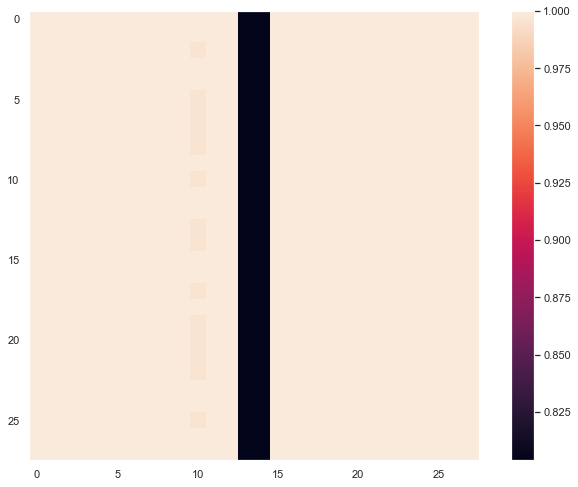

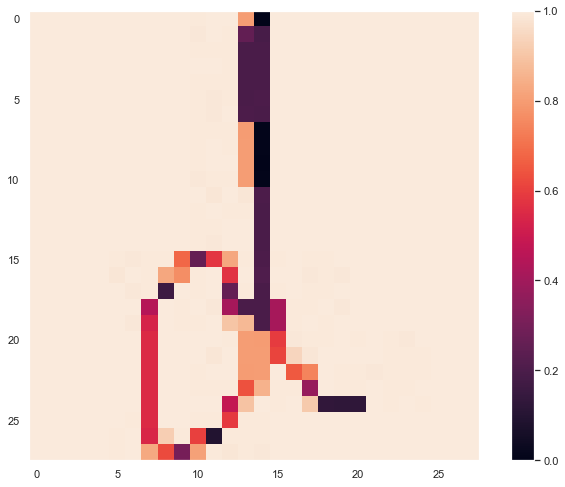

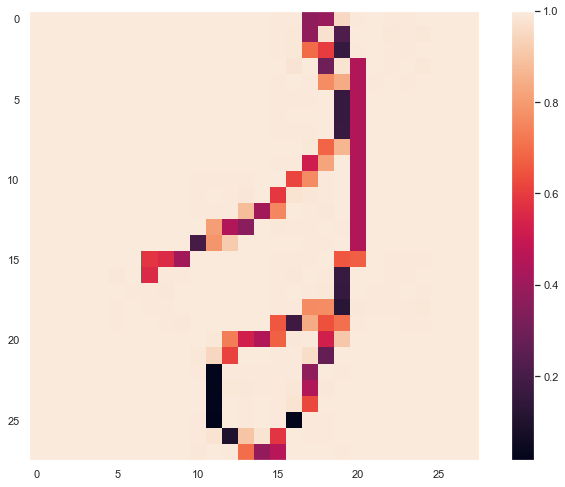

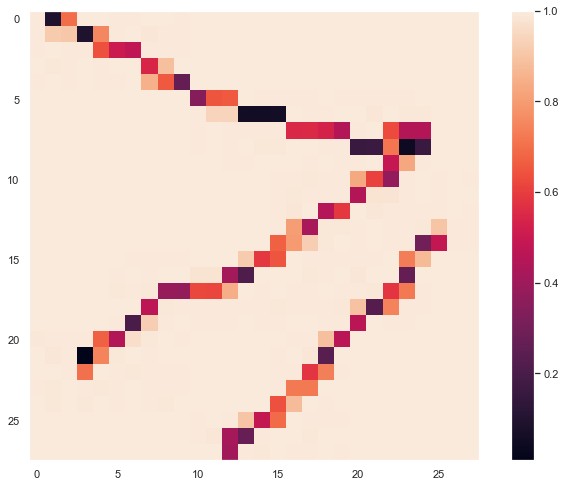

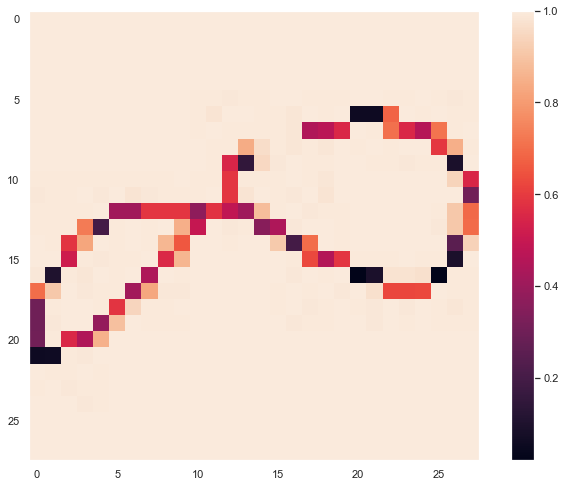

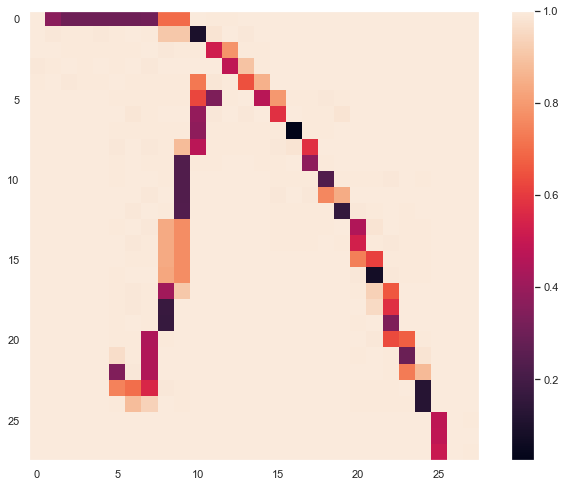

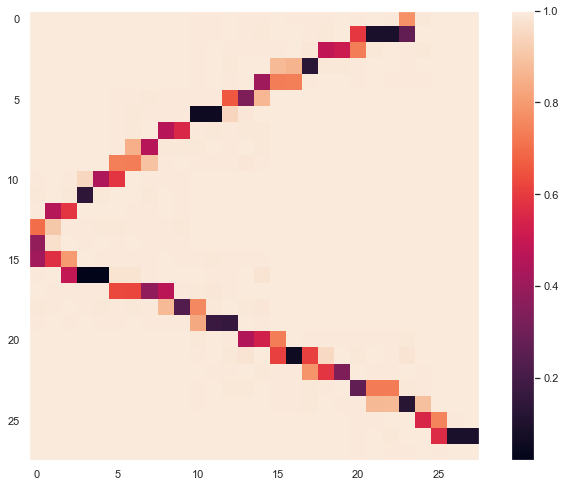

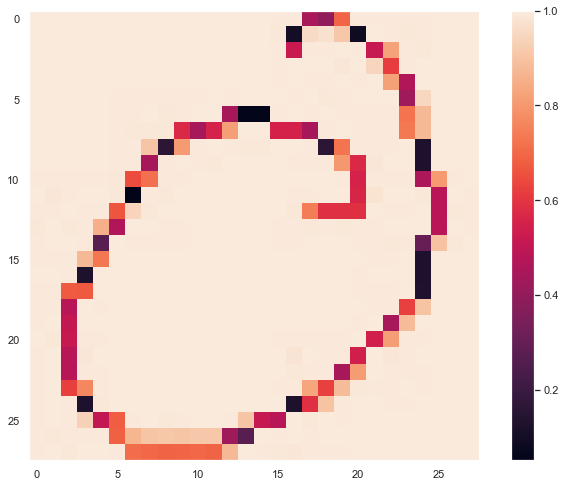

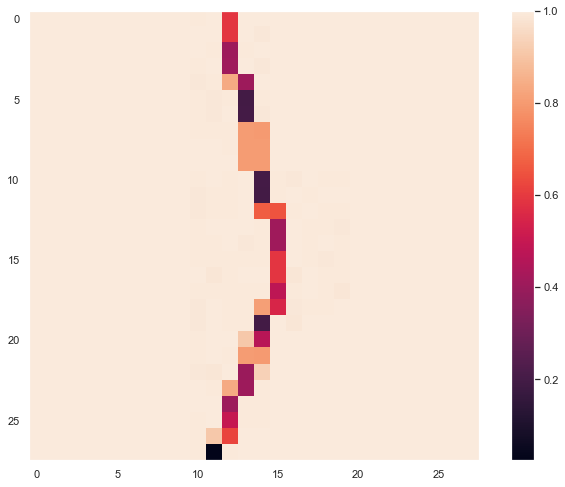

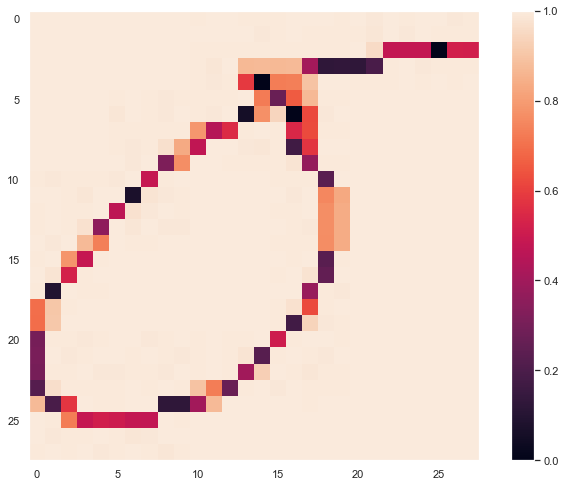

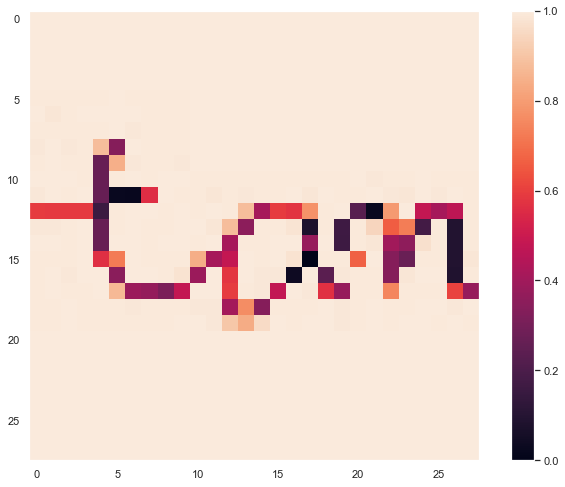

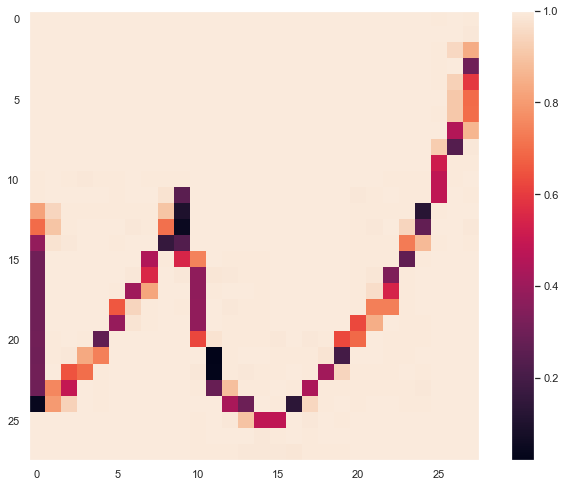

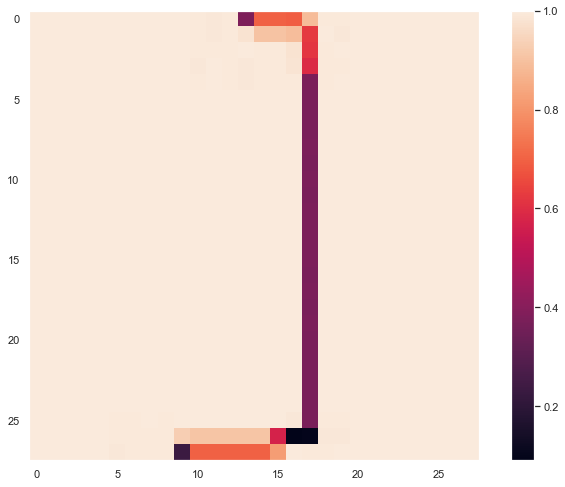

In [49]:
for i in range(19):
    result = np.argmax(predictions[i*500])
    print(enum_labels[result][1])

    plt.figure()
    plt.imshow(x_test[i*500])
    plt.colorbar()
    plt.grid(False)
    


In [54]:

def letters_extract(image_file: str, out_size=28):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=2)#1it

    # Get contours
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    output = img.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
        # hierarchy[i][0]: the index of the next contour of the same level
        # hierarchy[i][1]: the index of the previous contour of the same level
        # hierarchy[i][2]: the index of the first child
        # hierarchy[i][3]: the index of the parent
        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]
            # print(letter_crop.shape)

            # Resize letter canvas to square
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Enlarge image top-bottom
                # ------
                # ======
                # ------
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Enlarge image left-right
                # --||--
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            # Resize letter to 28x28 and add letter and its X-coordinate
            letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)

    plt.imshow(img)
    plt.show()
    plt.imshow(thresh)
    plt.show()
    plt.imshow(img_erode)
    plt.show()
    cv2.drawContours(img_erode, contours, -1, (0,255,0), 3)
    #cv2.imshow('image',output)
    #cv2.imshow('image',letters[0][2])
    # cv2_imshow(letters[1][2])
    # cv2_imshow(letters[2][2])
    # cv2_imshow(letters[3][2])
    # cv2_imshow(letters[4][2])

    # cv2_imshow(letters[5][2])
    # cv2_imshow(letters[6][2])
    # cv2_imshow(letters[7][2])
    # cv2_imshow(letters[8][2])
    #cv2_imshow(letters[9][2])
    #cv2.waitKey(0)
    
    
    #by matplot lib
    
    plt.imshow(img)
    plt.show()
    
    plt.imshow(output)
    plt.show()
    
    plt.imshow(thresh)
    plt.show()
    
    plt.imshow(img_erode)
    plt.show()
    for i in range(len(letters)):
        plt.figure(figsize = (1,1))
        plt.imshow(letters[i][2])
        plt.show()
 
    return letters


def emnist_predict(model, image_file):
    img = keras.preprocessing.image.load_img(image_file, target_size=(28, 28), color_mode='grayscale')
    emnist_predict_img(model, img)


def emnist_predict_img(model, img,enum_labels):
    #img_arr = np.expand_dims(img, axis=0)
    img_arr = 1 - np.array(img)/255
    #print(img_arr)
    img_arr = img_arr.reshape(-1,28,28,1)

    predict = model.predict(img_arr)
    result = np.argmax(predict)
    return enum_labels[result][1]

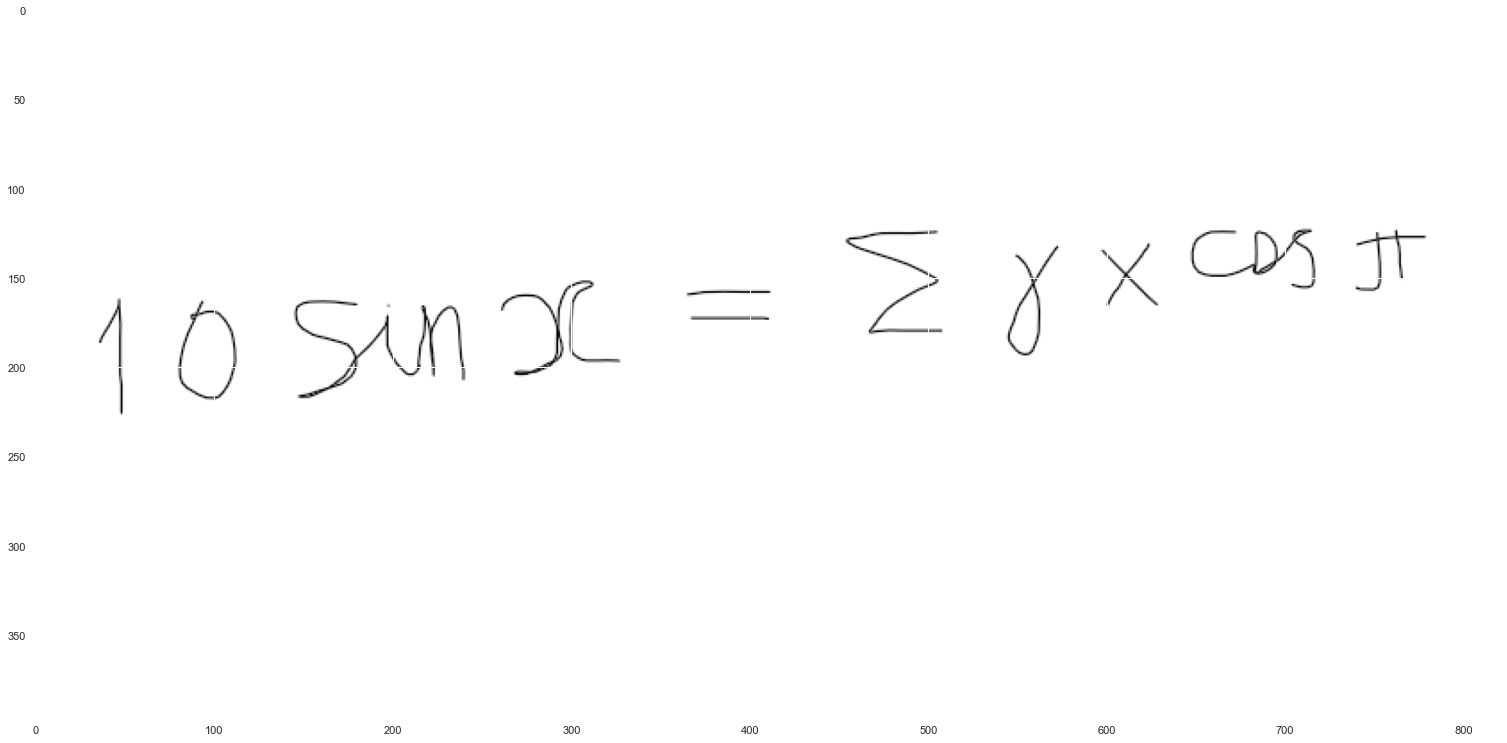

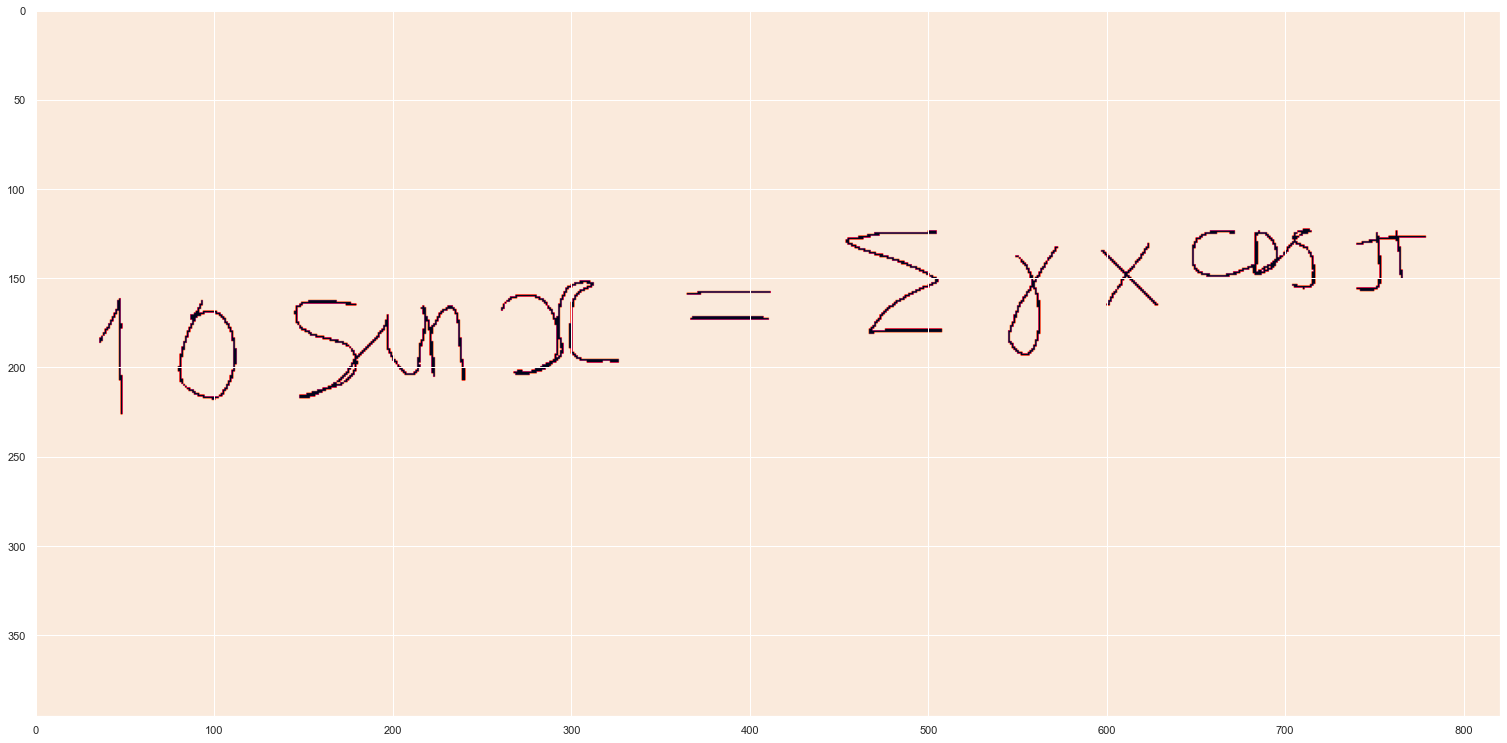

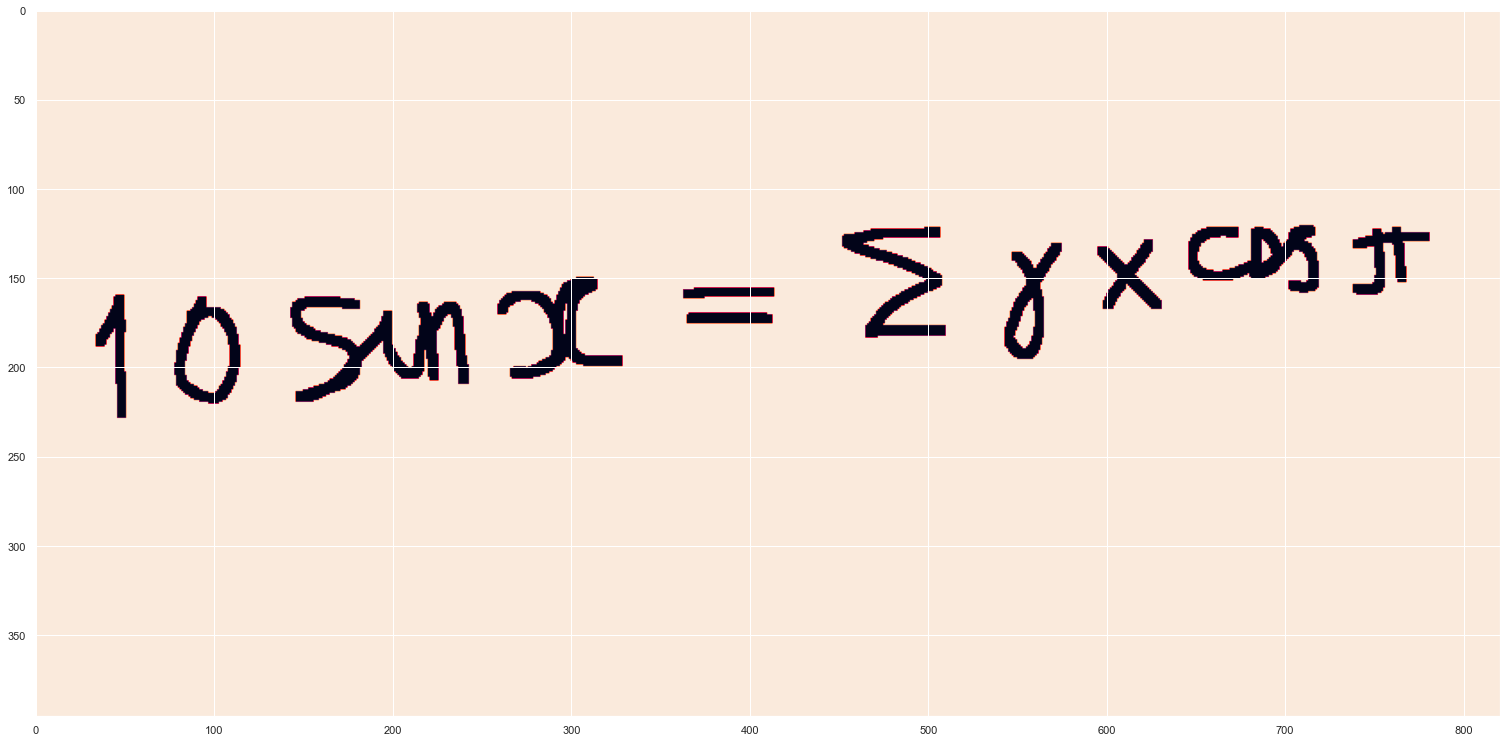

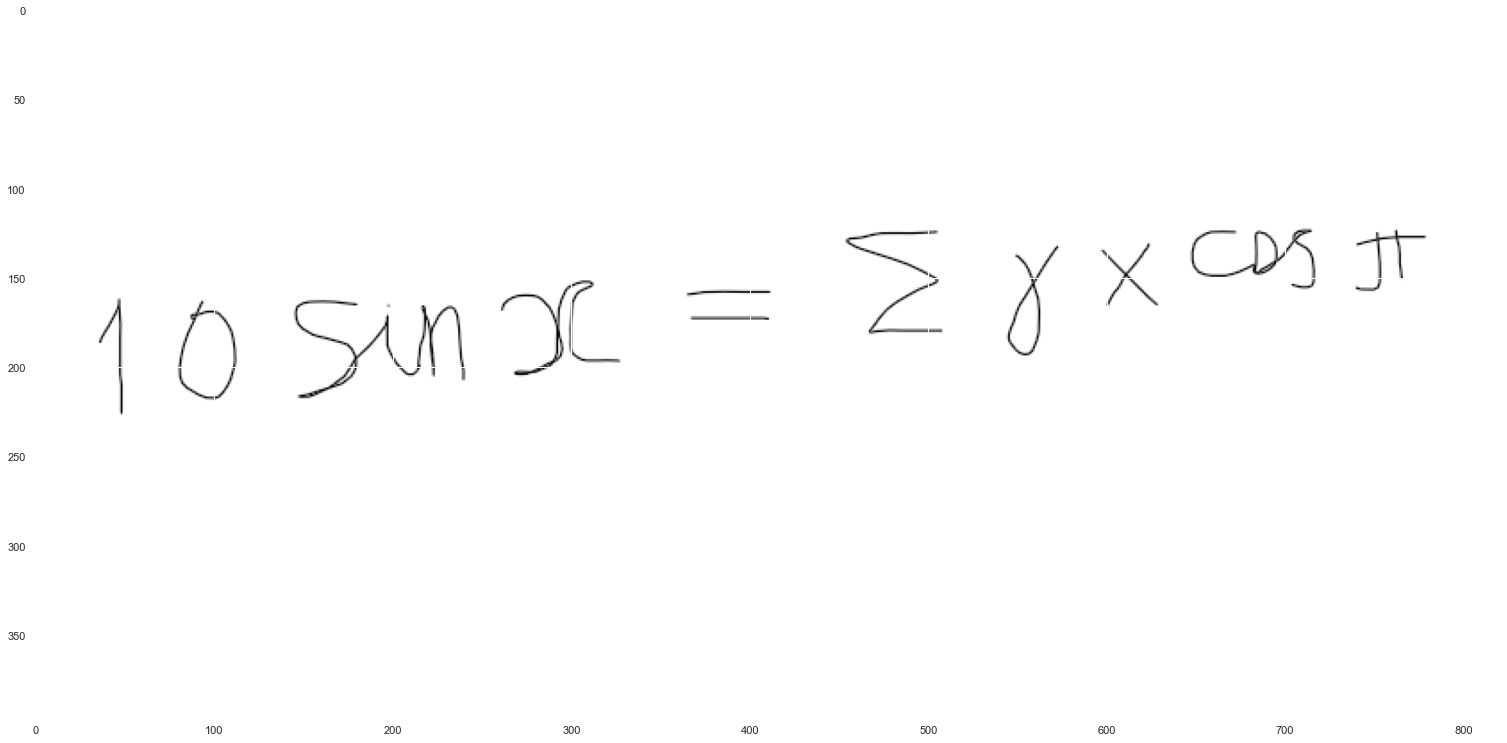

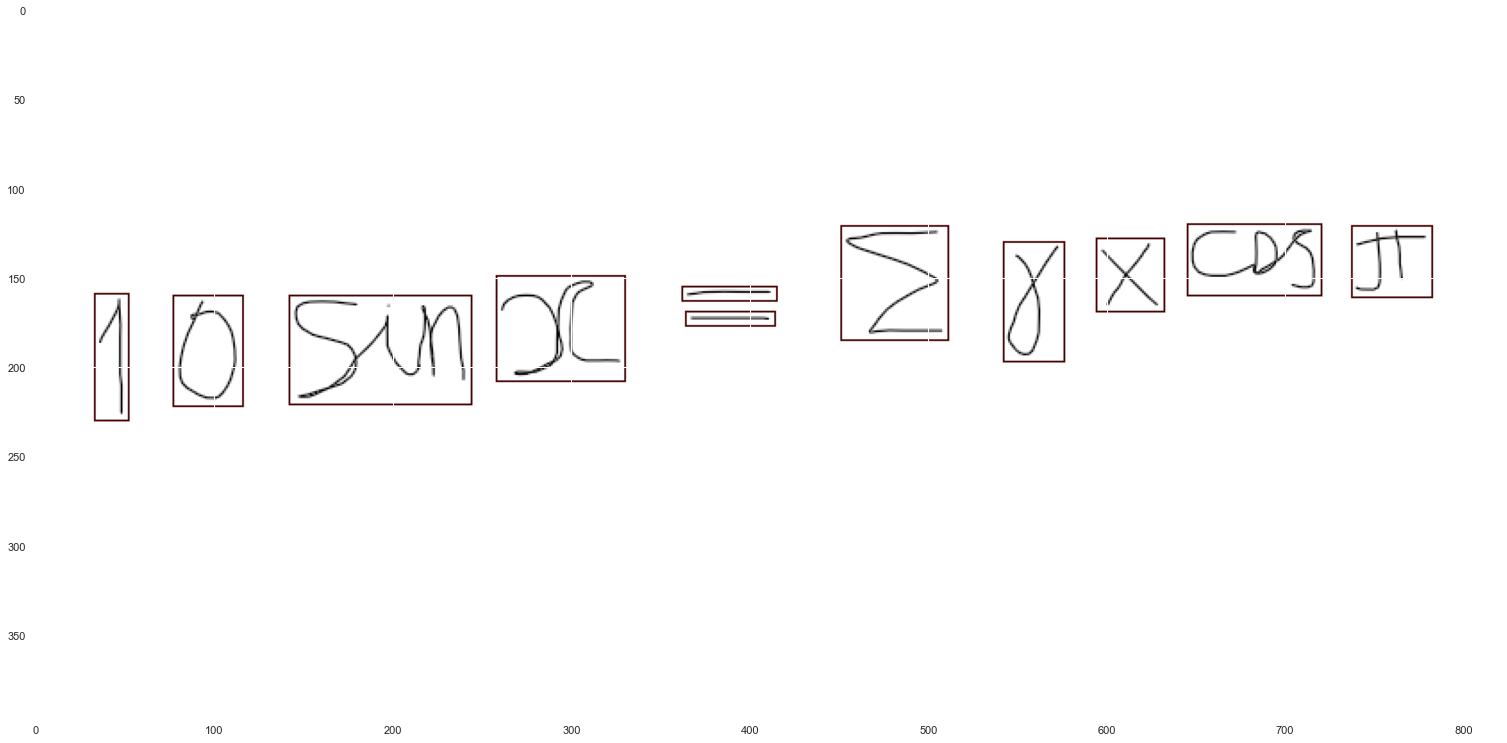

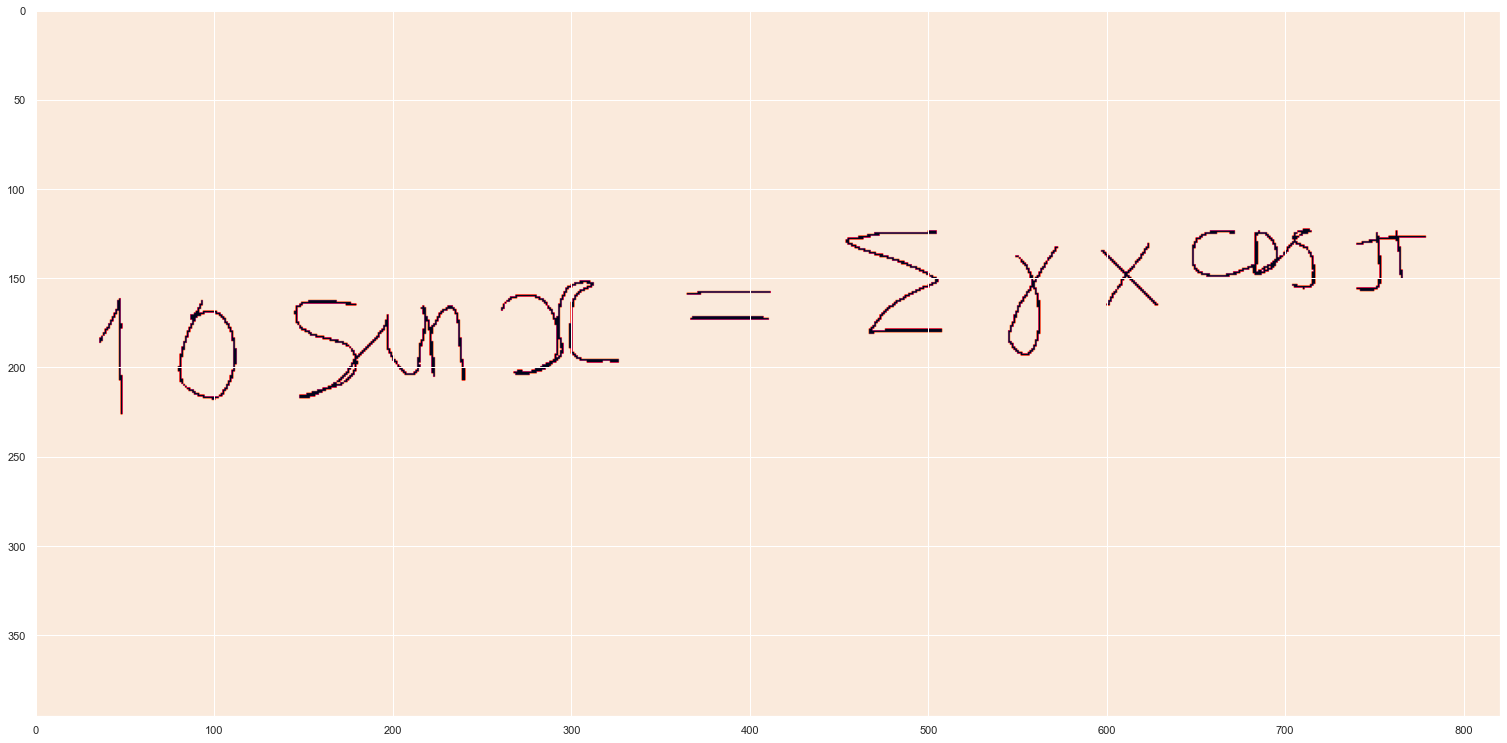

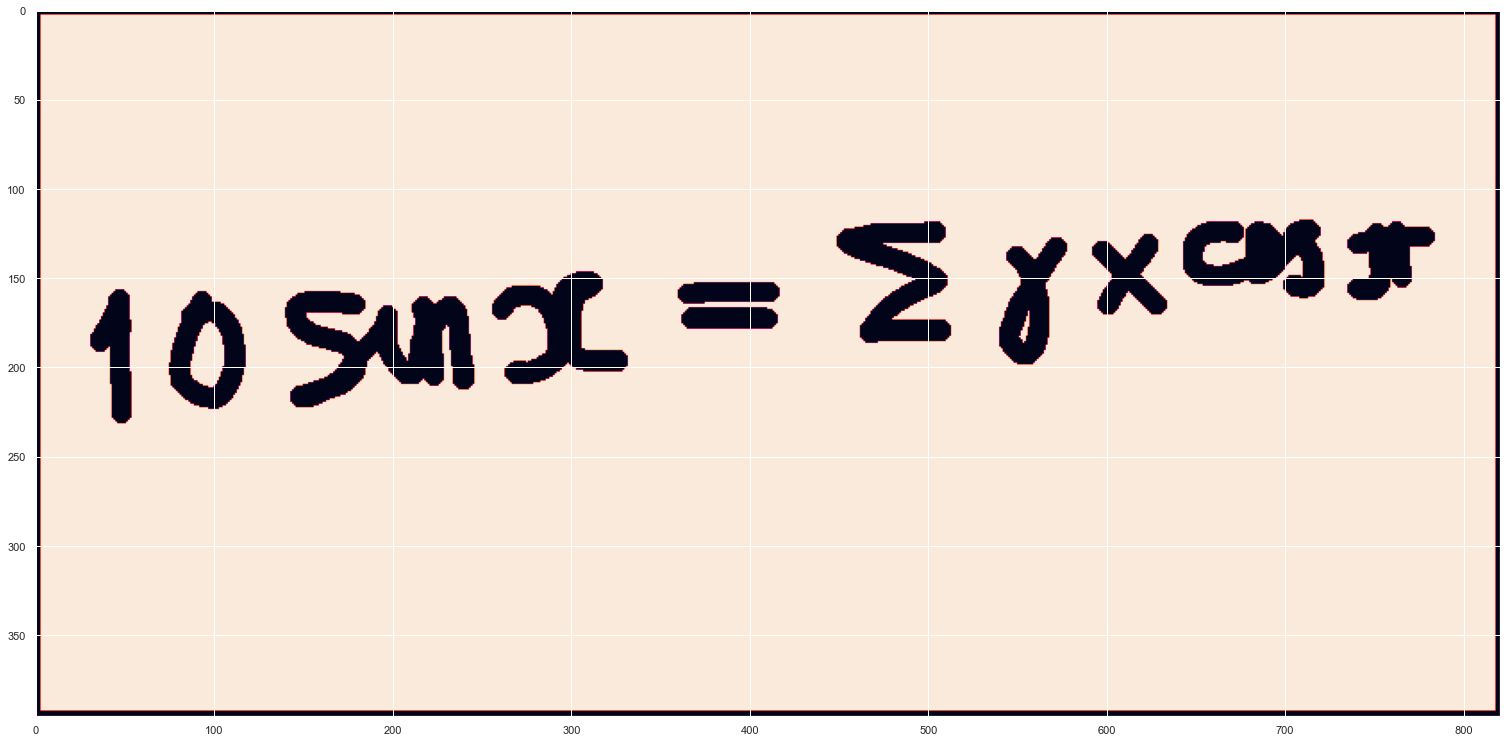

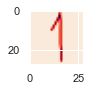

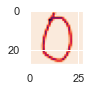

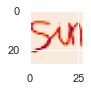

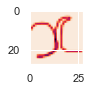

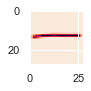

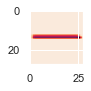

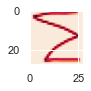

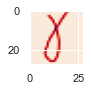

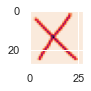

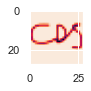

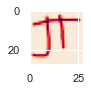

NameError: name 'enum_labels' is not defined

In [55]:
#считываем с картинки
for letter in letters_extract("math4.png"):
    print(emnist_predict_img(model,letter[2],enum_labels))

In [52]:
print(x_train.reshape(len(x_train),28,28,1).shape)

(73873, 28, 28, 1)
